In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Train data shape:', train.shape)
print('Test data shape:', test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
%matplotlib
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

Using matplotlib backend: Qt5Agg


## Check the statistic information of the SalePrice column

In [6]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### We know that the mean value is around 180000, but the most of the data is in the range between 130000 to 215000

## Skewness Check
Next, we'll check for skewness, which is a measure of the shape of the distribution of values.

In [7]:
print('Skew is', train.SalePrice.skew())

Skew is 1.8828757597682129


Note, 
1. it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data.
2. np.log() will transform the variable, and np.exp() will reverse the transformation.

Hist plot for SalePrice

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

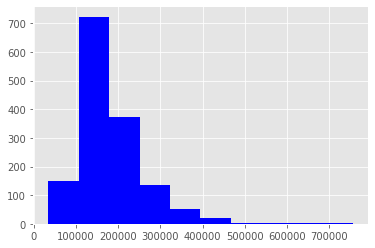

In [8]:
plt.hist(train.SalePrice, color='blue')

Now, we use np.log() to transform train.SalePrice and calculate the skewness a second time, as well as re-plot the data.

Skew is 0.12133506220520406


(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

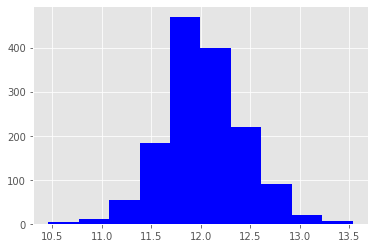

In [9]:
target = np.log(train.SalePrice)
print('Skew is', target.skew())
plt.hist(target, color='blue')


The Skewness is improved to a value closer to 0. We can also see this in the plot.

### Get all the numeric data

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
corr = numeric_features.corr()
corr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


Most positively related parameters

In [12]:
corr['SalePrice'].sort_values(ascending=False)[:5]

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

Most negatively related parameters

In [13]:
corr['SalePrice'].sort_values(ascending=False)[-5:]

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Let's dig deeper on OverallQual, we can use the .unique() method to get te unique values

In [14]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

The OverallQual data are integer values in the interval 1 to 10 inclusive.

Let's create a pivot table to further investigate the relationship between OverallQual and SalePrice.

In [15]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [16]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

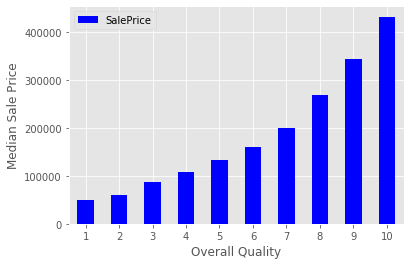

In [17]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

Notice that the median sales price strictly increases as Overall Quality increases.

The correlation can be also shown in scatter plot.See the relationship between the Ground Living Area GrLivArea and SalePrice.

Text(0.5, 0, 'Above grade(ground) living area square feet')

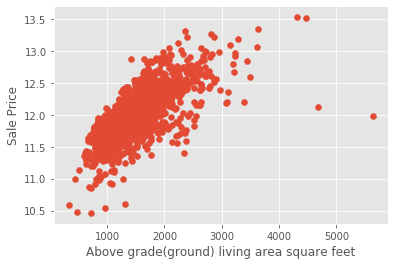

In [18]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade(ground) living area square feet')

At first glance, we see that increases in living area correspond to increases in price. Do the same for GarageArea

Text(0.5, 0, 'Garage Area')

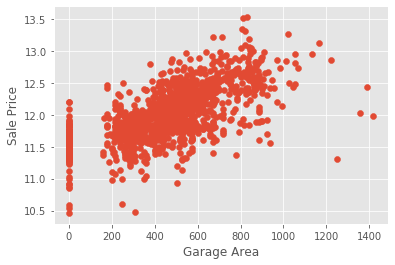

In [19]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

Notice:
1. 0 for Garage Area means no garage.
2. There are a few outliers.
3. Outliers may affect the estimated regression line further away
4. We will remove those outliers from our data.

### Handling Null Values

In [20]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


Let's look at one of the columns, MiscFeature.

In [21]:
print('Unique values are:', train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


## Wrangling the non-numeric Features

In [22]:
categoricals = train.select_dtypes(exclude=[np.number])

In [23]:
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


Here the categorical data will be transformed into numbers with one-hot encoding

## Transforming and engineering features

In [24]:
print('Original: \n')
print(train.Street.value_counts(),'\n')

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [25]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [26]:
print('Encoded:\n')
print(train.enc_street.value_counts())

Encoded:

1    1454
0       6
Name: enc_street, dtype: int64


The values agree. We've engineered the first feature! Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

Let's try engineering another feature.

In [27]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

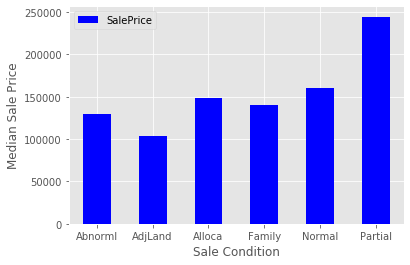

In [28]:
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

Notice that Partial has a significantly higher Median sale price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Partial and assign the value 1, otherwise assign 0.

In [29]:
def encode(x):
    return 1 if x=='Partial' else 0

In [30]:
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

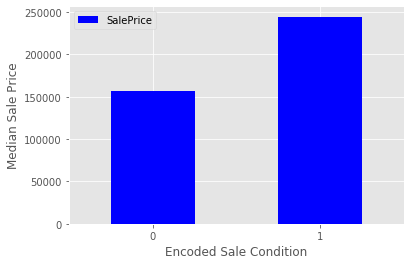

In [31]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)

Before we prepare the data for modeling, we need to deal with the missing data. We'll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference.

In [32]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

Check if all the columns have 0 null values

In [33]:
sum(data.isnull().sum() != 0)

0

## Build a Linear model

Let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. 

We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns we want to exclude. We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [34]:
y = np.log(train.SalePrice)

In [35]:
X = data.drop(['SalePrice', 'Id'], axis=1)

Let’s partition the data and start modeling.
We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

1. X_train is the subset of our features used for training.
2. X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
3. y_train is the target variable SalePrice which corresponds to X_train.
4. y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.33)

### Begin modelling

We will first create a Linear Regression model. First, we instantiate the model

In [38]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we’ll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [39]:
model = lr.fit(X_train, y_train)

### Evaluate the performance and visualize results

Now, we want to evaluate the performance of the model.
Each competition might evaluate the submissions differently. In this competition, Kaggle will evaluate our submission using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [71]:
print('R^2 is: \n', model.score(X_test, y_test))

R^2 is: 
 0.864746341057823


This means that our features explain approximately 86.5% of the variance in our target variable.

Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set.

In [72]:
predictions = model.predict(X_test)

The model.predict()method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

The mean_squared_error function takes two arrays and calculates the rmse.

In [42]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.023051468191912818


Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship graphically with a scatter plot.

Text(0.5, 1.0, 'Linear Regression Model')

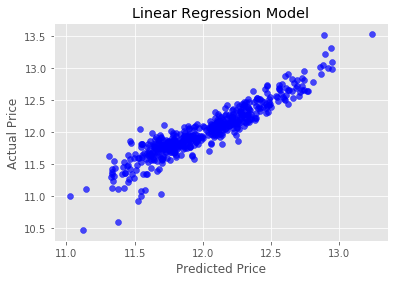

In [43]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

If our predicted values were identical to the actual values, this graph would be the straight line y=x because each predicted value x would be equal to each actual value y.

### Try to improve the model

We’ll next try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

We’ll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , which controls the strength of the regularization.

We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

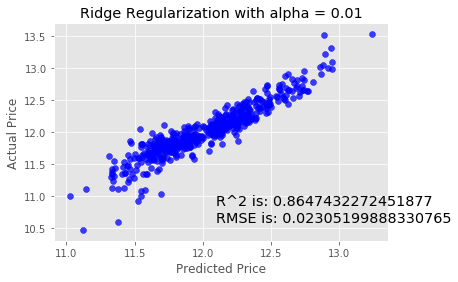

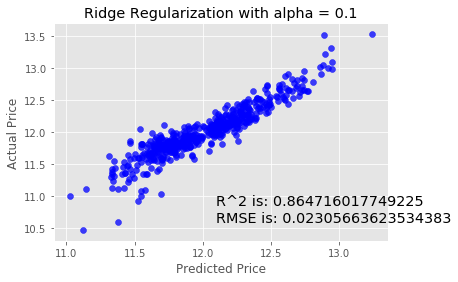

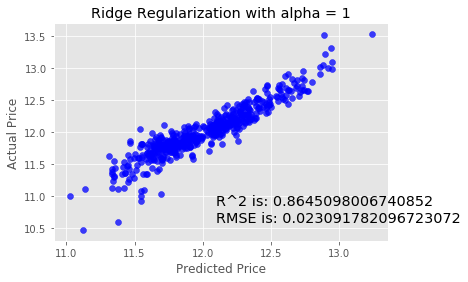

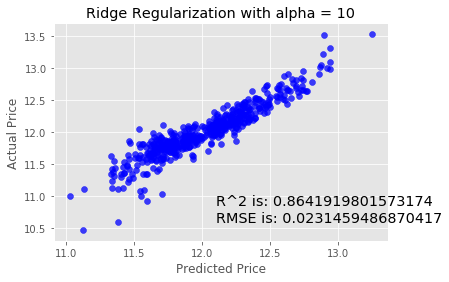

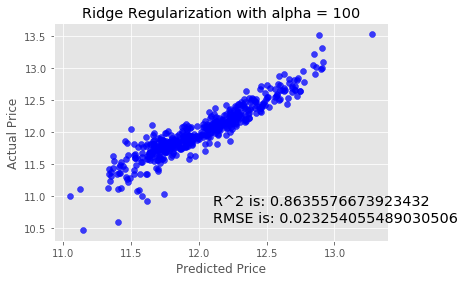

In [44]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

These models perform almost identically to the first model. In our case, adjusting the alpha did not substantially improve our model. As you add more features, regularization can be helpful. Repeat this step after you’ve added more features.

## Make a submission

We’ll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

We’ll log in to our Kaggle account and go to the submission page to make a submission.
We will use the DataFrame.to_csv() to create a csv to submit.
The first column must the contain the ID from the test data.

In [45]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Now, select the features from the test data for the model as we did above.

In [46]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [65]:
feats.shape

(1459, 38)

Next, we generate our predictions.

In [80]:
predictions = model.predict(feats)

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [82]:
final_predictions = np.exp(predictions)

Look at the difference.

In [83]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.68856268 11.71858472 12.03237122 12.18181274 12.10677502] 

Final predictions are: 
 [119200.5537467  122833.45845101 168109.56584158 195206.40091533
 181094.63485686]


Lets assign these predictions and check that everything looks good.

In [85]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,119200.553747
1,1462,122833.458451
2,1463,168109.565842
3,1464,195206.400915
4,1465,181094.634857


In [86]:
submission.to_csv('submission1.csv', index=False)